In [1]:
import pandas as pd                # importing & preprocessing of data
import numpy as np                 # to perform mathematical operations
import matplotlib.pyplot as plt    # data visualization
from mpl_toolkits import mplot3d
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# importing data from CSV file into pandas dataframe
dataset=pd.read_csv("database.csv")

In [4]:
# dataset structure
print("Column Name",end="")
for i in range(35-len("Column Name")):
    print(end=" ")
print(" Data Type")
print("-------------------------------------------------------------")
for col in dataset.columns:
    print(col,end="")
    for i in range(30-len(col)):
        print(end=" ")
    print("|   ",type(dataset[str(col)][0]))

Column Name                         Data Type
-------------------------------------------------------------
Date                          |    <class 'str'>
Time                          |    <class 'str'>
Latitude                      |    <class 'numpy.float64'>
Longitude                     |    <class 'numpy.float64'>
Type                          |    <class 'str'>
Depth                         |    <class 'numpy.float64'>
Depth Error                   |    <class 'numpy.float64'>
Depth Seismic Stations        |    <class 'numpy.float64'>
Magnitude                     |    <class 'numpy.float64'>
Magnitude Type                |    <class 'str'>
Magnitude Error               |    <class 'numpy.float64'>
Magnitude Seismic Stations    |    <class 'numpy.float64'>
Azimuthal Gap                 |    <class 'numpy.float64'>
Horizontal Distance           |    <class 'numpy.float64'>
Horizontal Error              |    <class 'numpy.float64'>
Root Mean Square              |    <class 'nump

In [5]:
# dataset description
dataset.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [6]:
# correlation analysis of the dataset
dataset.corr()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778


In [7]:
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
dataset.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


# Observations from data exploration

   1. Magnitude is our target variable.
   2. The average error in recording of magnitude is 0.07. Which means we hope to predict the value of dependent target variable with accuracy of one decimal place. 
   3. The correlation of target variable with respect to other columns is our criterion to select the independent variable.
   4. As we have 23,412 rows worth of data which is not enough to train any deep learning model with much of significant accuracy boost. So we are going to use a simple Random Forest regression model for predicting the value of our target variable.
   5. As part of intution we have encorporated Latitude and Longitude columns in our independent variables even though their correlation is less as compared to others as climate is very intrinsically dependent upon the topological instance of the area.

In [9]:
# eliminating NANs present in the dataset

values=dataset.mean(skipna=True).to_dict()    # fetches the column-wise means and converts it into a dictionary  
dataset=dataset.fillna(value=values)


In [10]:
# preprocessing date and time

date=dataset['Date'].values
day=[]
month=[]
year=[]
for i in range(len(date)):
    if len(date[i])>10:
        temp1=date[i].split('T')
        temp=temp1[0].split('-')
        y=temp[0]
        m=temp[1]
        d=temp[2]
    else:
        temp=date[i].split('/')
        y=temp[2]
        m=temp[0]
        d=temp[1]
    month.append(int(m))
    day.append(int(d))
    year.append(int(y))
    
time=dataset['Time']
hour=[]
minute=[]
seconds=[]
for i in range(len(time)):
    if len(date[i])>10:
        temp1=time[i].split('T')
        temp=temp1[1].split(':')
        h=temp[0]
        m=temp[1]
        s=temp[2].split('Z')[0]
    else:
        temp=time[i].split(':')
        h=temp[0]
        m=temp[1]
        s=temp[2]
    hour.append(int(h))
    minute.append(int(m))
    seconds.append(float(s))

In [11]:
# splitting the columns of the dataset into dependent and independent sets.

independentSet=['Date','Time','Latitude','Longitude','Depth','Horizontal Distance']
X=[]               # independent variable
Y=[]               # dependent variable
latitude=dataset['Latitude'].values
longitude=dataset['Longitude'].values
depth=dataset['Depth'].values
hd=dataset['Horizontal Distance'].values
for i in range(len(latitude)):
    temp=[]
    for feature in independentSet:
        if feature=='Date':
            temp.append(day[i])
            temp.append(month[i])
            temp.append(year[i])
        elif feature=='Time':
            temp.append(hour[i])
            temp.append(minute[i])
            temp.append(seconds[i])
        elif feature=='Latitude':
            temp.append(latitude[i])
        elif feature=='Longitude':
            temp.append(longitude[i])
        elif feature=='Depth':
            temp.append(depth[i])
        else:
            temp.append(hd[i])
    X.append(temp)
Y=dataset['Magnitude'].values
X=np.array(X)
Y=np.array(Y)

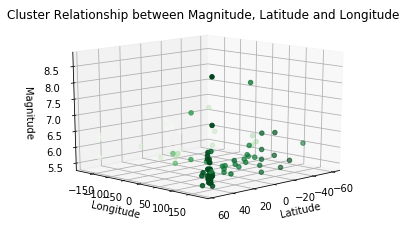

In [12]:
# Visualization
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(15,45)
ax.set_title('Cluster Relationship between Magnitude, Latitude and Longitude')
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_zlabel('Magnitude')
ax.scatter3D(latitude[:100],longitude[:100],Y[:100],c=longitude[:100],cmap='Greens')

### There is a special region where the clustered combination of latitude and longitude results into significant magnitude.

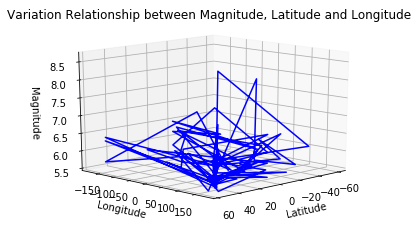

In [13]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(15,45)
ax.set_title('Variation Relationship between Magnitude, Latitude and Longitude')
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_zlabel('Magnitude')
ax.plot3D(latitude[:100],longitude[:100],Y[:100],'blue')

### As pointed out earlier that correlation of Magnitude is less with respect to Latitude ans longitude which can easily deduced from the plot above. Overall large variations are there which does not seem to depend in a particular fashion but on small steps we can see some straight lines which motivated us to incorporate as a feature in our analysis. 

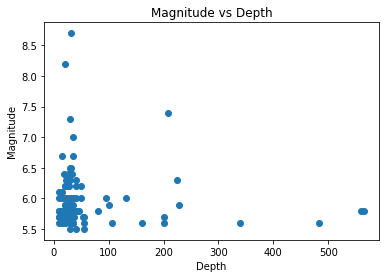

In [14]:
# visualization
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Depth')
plt.scatter(depth[:100],Y[:100])

### Magnitude seems to be dependent upon Depth only over a specific region which means we need to deploy a non linear model to completely fit this data as we have observed similar conclusion on 3D scatter plot of Magnitude vs Latitude and longitude.

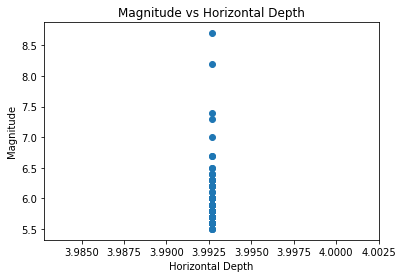

In [15]:
# visualization
plt.xlabel('Horizontal Depth')
plt.ylabel('Magnitude')
plt.title('Magnitude vs Horizontal Depth')
plt.scatter(hd[:100],Y[:100])

### According to this plot it is clear that magnitude varies very significantly over a very small variation in horizontal depth. 

In [16]:
ttsRatio=0.3      # trainning sample ratio with respect to total data
X_train=X[:int(ttsRatio * len(X))]
Y_train=Y[:int(ttsRatio * len(Y))]
X_test=X[int(ttsRatio * len(X)):]
Y_test=Y[int(ttsRatio * len(Y)):]

In [17]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [18]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
predicted=model.predict(X_test)

In [ ]:
predictionPerformance=model.score(X_test,Y_test)
print('R^2 score : ',predictionPerformance)

R^2 score :  -0.1625158779672764


In [ ]:
# multiple polynomial regression model
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4) 
X_poly_train=poly.fit_transform(X_train) 
poly.fit(X_poly_train,Y_train)
X_poly_test=poly.fit_transform(X_test)
poly.fit(X_poly_test,Y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_poly_train,Y_train)

In [ ]:
prediction=model.predict(X_poly_test)

In [ ]:
predictionPerformance=model.score(X_poly_test,Y_test)
print('R^2 score : ',predictionPerformance)

### Major disadvantage of polynomial regression is it's high sensitivity towards outliers. As outliers in the data tend to increase then then accuracy of the model suffers by the large margin as we can see from the above calculated R^2 score which is highly negative.  

In [ ]:
# support vector machine regressor
from sklearn.svm import SVR
model=SVR()

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
predicted=model.predict(X_test)

In [ ]:
predictionPerformance=model.score(X_test,Y_test)
print('R^2 score : ',predictionPerformance)

## Conclusion
  1. Polynomial regression has large degradation in it's performance due to presence of outliers in data.
  2. Support vector machine regression is best performing model which supports the notion popular in data science community that SVMs perform best for applications where there is lack of much data to train deep learning models.
  3. With proper tuning of parameters a much more concrete model can be formed which is our agenda for future.